# Chapter 5 Information Criteria

## 5.1 Information Criteria

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from scipy import stats
from numpy.random import randn

In [2]:
from sklearn.linear_model import LinearRegression
import itertools  # enumerate the combination

In [3]:
res = LinearRegression()

In [4]:
def RSS_min(X,y,T):
    S_min=np.inf
    m=len(T)
    for j in range(m):
        q=T[j]
        res.fit(X[:,q],y)
        y_hat=res.predict(X[:,q])
        S=np.linalg.norm(y_hat-y)**2
        if S<S_min:
            S_min=S
            set_q=q
    return(S_min, set_q)

In [5]:
from sklearn.datasets import load_boston

In [6]:
boston = load_boston()
X=boston.data[:,[0,2,4,5,6,7,9,10,11,12]]
y=boston.target

In [7]:
n,p=X.shape
AIC_min=np.inf
for k in range(1,p+1,1):
    T=list(itertools.combinations(range(p), k))
    # each column consists of the combinations (k out of p)
    S_min, set_q=RSS_min(X,y,T)
    AIC=n*np.log(S_min/n)+2*k  ##
    if AIC<AIC_min:
        AIC_min=AIC
        set_min=set_q
print(AIC_min,set_min)

1619.7876085566147 (0, 2, 3, 5, 7, 8, 9)


In [8]:
y_bar=np.mean(y)
TSS=np.linalg.norm(y-y_bar)**2

In [9]:
D_max=-np.inf
for k in range(1,p+1,1):
    T=list(itertools.combinations(range(p), k))
    S_min, set_q=RSS_min(X,y,T)
    D=1-(S_min/(n-k-1))/(TSS/(n-1))
    if D>D_max:
        D_max=D
        set_max=set_q
print(D_max,set_max)

0.7130213433266738 (0, 2, 3, 5, 7, 8, 9)


In [10]:
def IC(X,y,k):
    n,p=X.shape
    T=list(itertools.combinations(range(p), k))
    S, set_q=RSS_min(X,y,T)
    AIC=n*np.log(S/n)+2*k
    BIC=n*np.log(S/n)+k*np.log(n)
    return {'AIC':AIC, 'BIC':BIC}

In [11]:
AIC_seq=[]; BIC_seq=[]
for k in range(1,p+1,1):
    AIC_seq.append(IC(X,y,k)['AIC'])
    BIC_seq.append(IC(X,y,k)['BIC']) 

In [12]:
x_seq=np.arange(1,p+1,1)

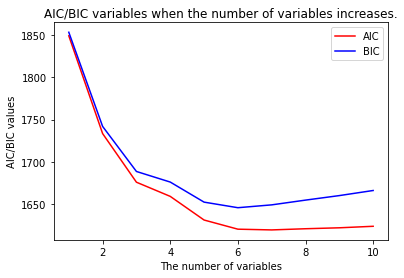

In [13]:
plt.plot(x_seq,AIC_seq,c="red",label="AIC")
plt.plot(x_seq,BIC_seq,c="blue",label="BIC")
plt.xlabel("The number of variables")
plt.ylabel("AIC/BIC values")
plt.title("AIC/BIC variables when the number of variables increases.")
plt.legend()

## 5.2  Efficient Estimator and Fisher Information Matrix

## 5.3 Kullback-Leibler Divergence

## 5.4 Derivation of Akaike's Information Criterion (AIC)